In [1]:
from config import cfg
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils import multiple_bar, avg_salary_by_job, total_vals_over_gr, peek2data, data_check, avg_salary_over_focus, convert_cols, split_data_by_time
from sklearn.metrics import mean_squared_error

dt = pd.read_csv(cfg.data_path)
dt.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
dt.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [3]:
dt.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

```

train_data = dt[dt['work_year'] != 2023]
test_data = dt[dt['work_year'] == 2023]
print(f'training data shape {train_data.shape}')
print(f'testing data shape {test_data.shape}')
train_data.head()

```

```

y_train = train_data['salary_in_usd']
x_train = train_data.drop(columns='salary_in_usd')
x_train.head()

SS = StandardScaler()
RS = RobustScaler()
MMS = MinMaxScaler()
data['fare_SS'] = SS.fit_transform(data[['fare']])
data['fare_RS'] = RS.fit_transform(data[['fare']])
data['fare_MMS']= MMS.fit_transform(data[['fare']])

```

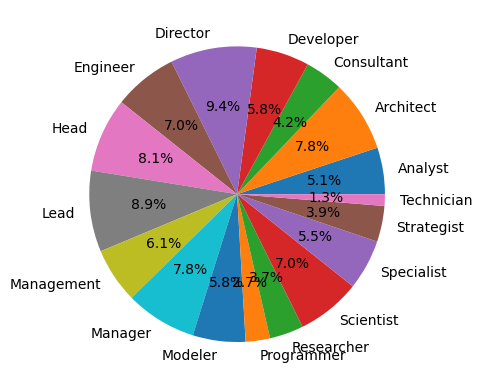

In [4]:
avg_salary_over_focus(dt)

In [5]:
data_check(dt)

Missing values:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
focus                 0
dtype: int64
Columns only have one unique type of object (int, str, etc.)
ALL GOOD. Data is clear to work on it


In [6]:
peek2data(dt)

--------------------------------------------------
work_year has 4 unique values
unique values: [2023 2022 2020 2021]
--------------------------------------------------
experience_level has 4 unique values
unique values: ['SE' 'MI' 'EN' 'EX']
--------------------------------------------------
employment_type has 4 unique values
unique values: ['FT' 'CT' 'FL' 'PT']
--------------------------------------------------
job_title has 93 unique values
not printed due to large unique values:
--------------------------------------------------
salary has 815 unique values
not printed due to large unique values:
--------------------------------------------------
salary_currency has 20 unique values
unique values: ['EUR' 'USD' 'INR' 'HKD' 'CHF' 'GBP' 'AUD' 'SGD' 'CAD' 'ILS' 'BRL' 'THB'
 'PLN' 'HUF' 'CZK' 'DKK' 'JPY' 'MXN' 'TRY' 'CLP']
--------------------------------------------------
salary_in_usd has 1035 unique values
not printed due to large unique values:
-------------------------------------

HKD will not be added to bar chart due to lack of info for 3 years
CHF will not be added to bar chart due to lack of info for 2 years
AUD will not be added to bar chart due to lack of info for 1 years
SGD will not be added to bar chart due to lack of info for 1 years
ILS will not be added to bar chart due to lack of info for 3 years
BRL will not be added to bar chart due to lack of info for 1 years
THB will not be added to bar chart due to lack of info for 3 years
PLN will not be added to bar chart due to lack of info for 1 years
HUF will not be added to bar chart due to lack of info for 1 years
CZK will not be added to bar chart due to lack of info for 3 years
DKK will not be added to bar chart due to lack of info for 2 years
JPY will not be added to bar chart due to lack of info for 2 years
MXN will not be added to bar chart due to lack of info for 3 years
TRY will not be added to bar chart due to lack of info for 3 years
CLP will not be added to bar chart due to lack of info for 3 y

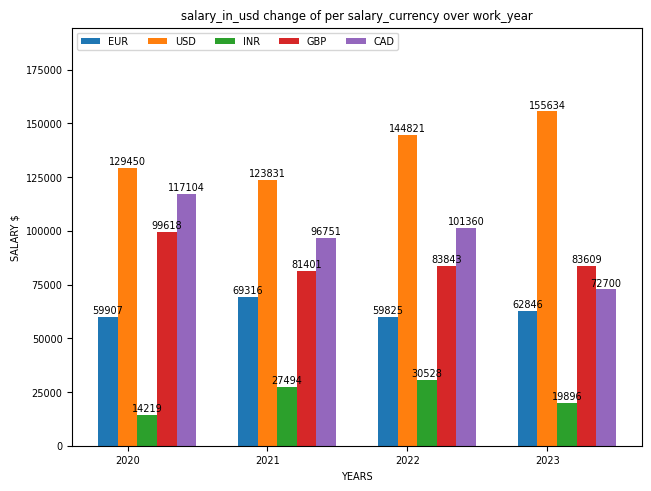

In [7]:
multiple_bar(dt, compared_col='salary_currency', width=0.14)

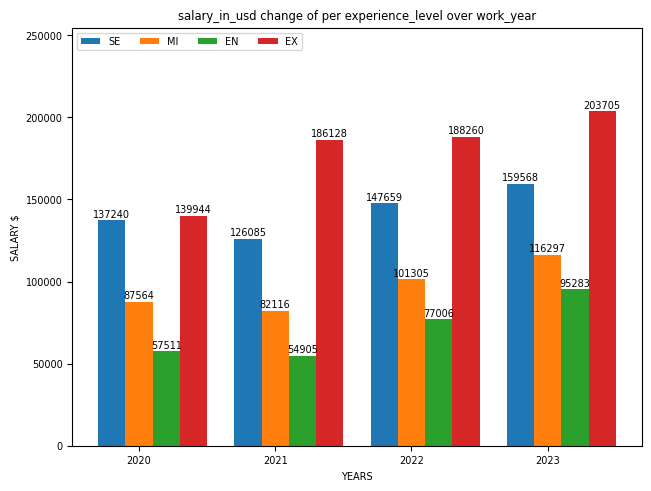

In [8]:
multiple_bar(dt, compared_col='experience_level', width=0.2)

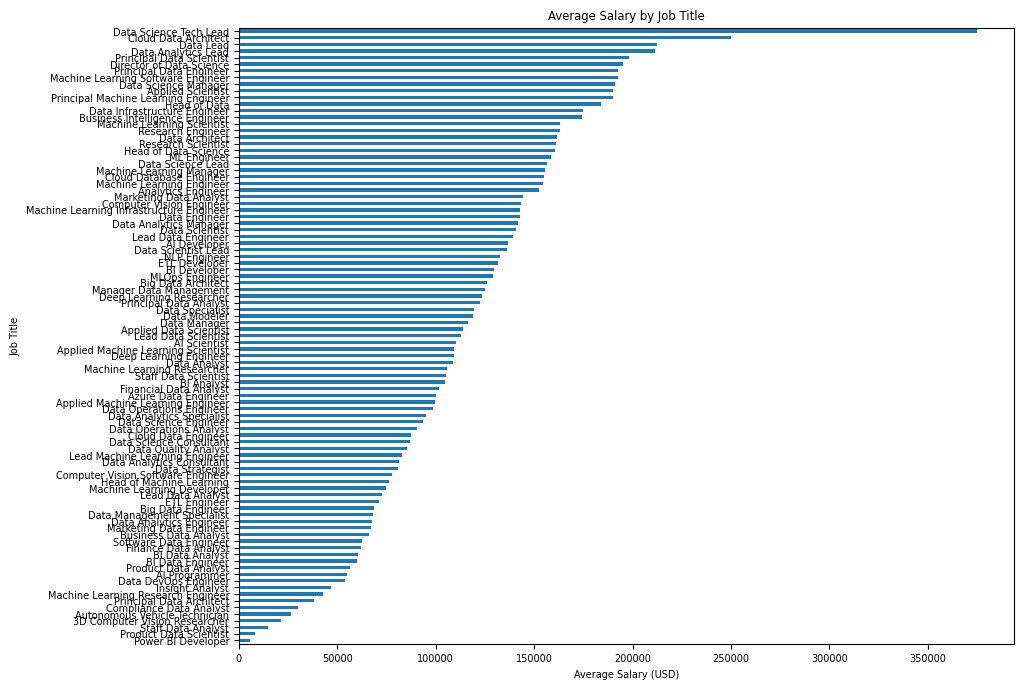

In [9]:
avg_salary_by_job(dt)

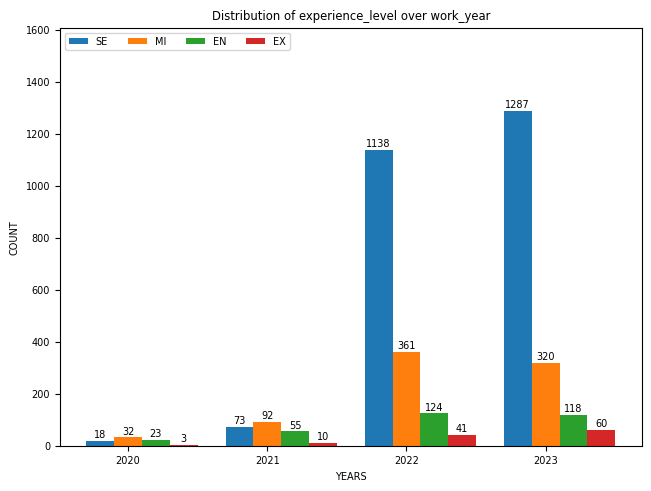

In [10]:
total_vals_over_gr(dt)

In [11]:
dt = convert_cols(dt)

In [12]:
x_train, y_train, x_test, y_test = split_data_by_time(dt, shuffle=True)

training data shape (1970, 19)
testing data shape (1785, 19)


In [13]:
x_test.head()

,work_year,salary,salary_in_usd,remote_ratio,job_title_cat,salary_currency_cat,employee_residence_cat,company_location_cat,experience_level_cat,employment_type_cat,company_size_cat
0,2023,80000,85847,100,84,7,26,25,3,4,3
1,2023,30000,30000,100,66,19,75,70,2,1,1
2,2023,25500,25500,100,66,19,75,70,2,1,1
3,2023,175000,175000,100,47,19,11,12,3,4,2
4,2023,120000,120000,100,47,19,11,12,3,4,2


In [14]:
x_train.head()

,work_year,salary,salary_in_usd,remote_ratio,job_title_cat,salary_currency_cat,employee_residence_cat,company_location_cat,experience_level_cat,employment_type_cat,company_size_cat
1910,2022,106500,106500,0,33,19,75,70,3,4,2
2127,2022,70000,70000,0,49,19,75,70,3,4,2
2871,2022,50000,50000,50,47,19,75,20,1,4,2
2844,2022,63000,63000,100,54,19,75,70,3,4,2
2111,2022,162000,162000,100,33,19,75,70,3,4,2


In [15]:
# Deploying RF Model
from sklearn.ensemble import RandomForestRegressor
RFModel = RandomForestRegressor(n_estimators=222)
RFModel.fit(x_train, y_train)
y_pred_rf = RFModel.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f'RMSE Error: {RMSE} for Random Forest Model')
 


RMSE Error: 1005.7140360065457 for Random Forest Model


In [16]:
# Deploying XGBoost Model
import xgboost as xgb
XGBModel = xgb.XGBRegressor(n_estimators=222)
XGBModel.fit(x_train, y_train)
y_pred_xgb = XGBModel.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'RMSE Error: {RMSE} for XGBoost Model')

RMSE Error: 1022.025059969948 for XGBoost Model


In [17]:
eval_dt = pd.DataFrame({'y_test':y_test.values, 'y_xgb': y_pred_xgb, 'y_rf': y_pred_rf})
eval_dt.head()

,y_test,y_xgb,y_rf
0,85847,85620.648438,86035.923423
1,30000,29992.474609,29981.689189
2,25500,26014.365234,25385.581081
3,175000,175144.734375,174988.846847
4,120000,120102.000000,120009.054054


In [18]:
x_test.head()

,work_year,salary,salary_in_usd,remote_ratio,job_title_cat,salary_currency_cat,employee_residence_cat,company_location_cat,experience_level_cat,employment_type_cat,company_size_cat
0,2023,80000,85847,100,84,7,26,25,3,4,3
1,2023,30000,30000,100,66,19,75,70,2,1,1
2,2023,25500,25500,100,66,19,75,70,2,1,1
3,2023,175000,175000,100,47,19,11,12,3,4,2
4,2023,120000,120000,100,47,19,11,12,3,4,2


In [20]:
x_test.shape, y_pred_rf.shape, y_pred_xgb.shape

((1785, 11), (1785,), (1785,))

In [32]:
eval_dt = pd.DataFrame({'y_test':y_test.values, 'y_xgb': y_pred_xgb, 'y_rf': y_pred_rf})

eval_dt.head(20)

,y_test,y_xgb,y_rf
0,85847,85620.648438,86035.923423
1,30000,29992.474609,29981.689189
2,25500,26014.365234,25385.581081
3,175000,175144.734375,174988.846847
4,120000,120102.000000,120009.054054
5,222200,223222.656250,222331.936937
6,136000,135882.468750,136017.297297
7,219000,220299.828125,218690.540541
8,141000,141633.156250,140886.148649
9,147100,147600.812500,146978.378378


In [23]:
# Find rows containing NaN elements
nan_rows = eval_dt[eval_dt.isnull().any(axis=1)]

# Display the rows containing NaN elements
print(nan_rows)

Empty DataFrame
Columns: [y_test, y_xgb, y_rf]
Index: []


<Axes: >

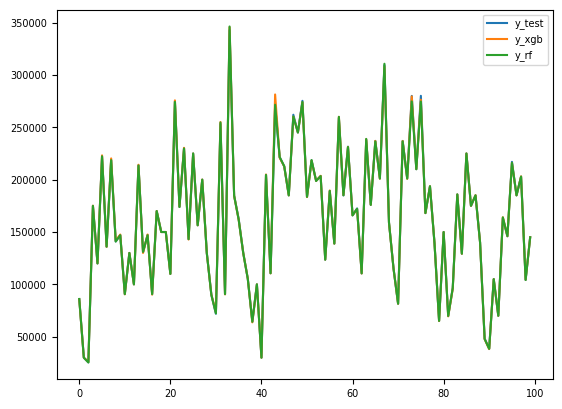

In [25]:
eval_dt.iloc[:100].plot()

,work_year,salary,salary_in_usd,remote_ratio,job_title_cat,salary_currency_cat,employee_residence_cat,company_location_cat,experience_level_cat,employment_type_cat,company_size_cat
1815,2023,134500,134500,0,69,19,75,70,3,4,3
1817,2023,130000,130000,0,47,19,75,70,2,4,2
1818,2023,90000,90000,0,47,19,75,70,2,4,2
1819,2023,160000,160000,0,33,19,75,70,1,4,2
1820,2023,135000,135000,0,33,19,75,70,1,4,2


In [29]:
from sklearn.model_selection import cross_val_score

y_pred_kfold_rf = cross_val_score(RFModel, pd.concat((x_train,x_test)), pd.concat((y_train,y_test)), cv=5)
y_pred_kfold_xgb = cross_val_score(XGBModel, pd.concat((x_train,x_test)), pd.concat((y_train,y_test)), cv=5)

In [31]:
print(f'K=5 Fold Cross Validation Score of RF: {np.mean(y_pred_kfold_rf)} --> {y_pred_kfold_rf}')
print(f'K=5 Fold Cross Validation Score of XGB: {np.mean(y_pred_kfold_xgb)} --> {y_pred_kfold_xgb}')

K=5 Fold Cross Validation Score of RF: 0.9996741591907347 --> [0.99917798 0.99935141 0.99995338 0.99993784 0.99995019]
K=5 Fold Cross Validation Score of XGB: 0.9992367195817348 --> [0.99864769 0.99789353 0.99990138 0.99994215 0.99979885]
